In [1]:
import numpy as np
import nafflib



#=================================
num_turns = int(3e4)
files = [f'tests/data/LHC_particle_{s}_momentum_{i}sigma.csv'  for s in ['on','off'] for i in [1,3,5]]
#-------------------
def read_csv(filename):
    filecontent = np.genfromtxt(filename,
                            delimiter   =',',
                            skip_header = 1,
                            converters  = {col: lambda s: complex(s.decode()) for col in [1,3,5]},
                            unpack=True)
    data = {}
    data['Ax']      = filecontent[1]
    data['Qx']      = filecontent[2]
    data['Ay']      = filecontent[3]
    data['Qy']      = filecontent[4]
    data['Azeta']   = filecontent[5]
    data['Qzeta']   = filecontent[6]
    return data
#-------------------
example_signals = []
for file in files:
    data = read_csv(file)
    data['name'] = file
    for plane in ['x','y','zeta']:
        z,pz = nafflib.generate_signal(data[f'A{plane}'],data[f'Q{plane}'],np.arange(num_turns))
        data[f'{plane}']  = z
        data[f'p{plane}'] = pz
    example_signals.append(data)
#=================================
        

# def test_map():
n_harm   = 100
cmp_harm = 5
N = np.arange(num_turns)
for data in example_signals:
    Q_vec = [nafflib.tune(data[f'{plane}'],data[f'p{plane}'],window_order=4) for plane in ['x','y','zeta']]
    
    for plane in ['x','y','zeta']:
        A,Q      = data[f'A{plane}'],data[f'Q{plane}']
        z_r,pz_r = data[f'{plane}'] ,data[f'p{plane}']

        # Finding harmonics
        A_r,Q_r = nafflib.harmonics(z_r,pz_r,   num_harmonics = n_harm,
                                                window_order  = 4,
                                                window_type   = 'hann')


        # Reconstructing signal
        z_rr,pz_rr = nafflib.generate_signal(A_r,Q_r,N)

        # Comparing tracking results
        assert np.allclose(z_r,z_rr,   atol=1e-3,rtol=0), f'X-Phasor tracking exceeded tolerance, in {data["name"]}, {plane} plane'
        assert np.allclose(pz_r,pz_rr, atol=1e-3,rtol=0), f'PX-Phasor tracking exceeded tolerance, in {data["name"]}, {plane} plane'


        # Looking for matching harmonics
        # Sorting lines and compiling errors
        #-----------------------------------
        r,_,_ = nafflib.find_linear_combinations(Q[:int(2*cmp_harm)],fundamental_tunes= Q_vec)
        r_found,_,_  = nafflib.find_linear_combinations(Q_r[:cmp_harm],fundamental_tunes  = Q_vec,
                                                                             max_harmonic_order = 10)

        errors_Q = []
        errors_A = []
        for res,_A,_Q in zip(r_found,A_r,Q_r):
            match_idx = r.index(res)
            errors_Q.append(np.abs(Q[match_idx]-_Q))
            errors_A.append(np.abs(np.abs(A[match_idx])-np.abs(_A)))
        #-----------------------------------
            
        assert np.allclose(errors_Q,0, atol=1e-11,rtol=0), f'Q-tolerance not met, in {data["name"]}, {plane} plane'
        assert np.allclose(errors_A,0, atol=1e-10,rtol=0), f'A-tolerance not met, in {data["name"]}, {plane} plane'

        


In [8]:
nafflib.__path__[0] + '/../test'

'/Users/pbelanger/ABPLocal/nafflib/nafflib../test'

In [3]:
errors_Q

[1.9257338779166133e-13,
 3.2425539114394556e-11,
 8.556483237654594e-09,
 1.629517141013559e-09,
 1.8632664855466885e-14]

In [19]:
Q-Q_r

array([ 1.98907514e-13,  1.22634672e-12,  8.40638323e-14, -9.48546797e-14,
        2.56992426e-13,  2.49066809e-11,  2.64133715e-11,  8.57681981e-14,
        1.27674347e-13,  7.72449854e-10, -8.72675491e-11, -6.03386494e-10,
       -5.45352881e-10,  1.11049078e-09,  1.01792429e-11,  2.69100384e-11,
        5.24030389e-10,  2.18937438e-11,  7.29089011e-12,  1.37532347e-12,
       -7.35336791e-12, -9.03582764e-13, -3.34814121e-12,  9.05599061e-10,
        3.18999688e-12, -9.23674748e-10, -1.62670918e-11,  1.31401556e-11,
       -1.40993883e-11,  8.15503221e-12, -7.35655981e-12, -3.39379198e-09,
        1.62227870e-11,  2.88542271e-09, -3.48054918e-13, -4.10171896e-13,
        3.30772965e-09, -3.67106345e-12,  4.61064520e-12, -2.81316698e-09,
       -3.97035183e-12, -1.45742302e-09, -1.56752389e-12,  1.41464063e-11,
        1.47107804e-09,  3.78896914e-12,  5.76771964e-12, -5.96399319e-12,
        6.12593309e-12,  1.49139034e-12, -3.47742946e-11, -1.03869691e-11,
        1.01614828e-11, -

In [61]:
file = 'tests/data/LHC_particle_on_momentum_1sigma.csv'
import pandas as pd
df  = pd.read_csv(file,index_col=0)
data = {} 
filecontent = np.genfromtxt(file,
                            delimiter   =',',
                            skip_header = 1,
                            converters  = {col: lambda s: complex(s.decode()) for col in [1,3,5]},
                            unpack=True)
data['Ax']      = filecontent[1]
data['Qx']      = filecontent[2]
data['Ay']      = filecontent[3]
data['Qy']      = filecontent[4]
data['Azeta']   = filecontent[5]
data['Qzeta']   = filecontent[6]


In [69]:
[[f'tests/data/LHC_particle_{s}_momentum_{i}sigma.csv' for i in [1,3,5]] for s in ['on','off']]

[['tests/data/LHC_particle_on_momentum_1sigma.csv',
  'tests/data/LHC_particle_on_momentum_3sigma.csv',
  'tests/data/LHC_particle_on_momentum_5sigma.csv'],
 ['tests/data/LHC_particle_off_momentum_1sigma.csv',
  'tests/data/LHC_particle_off_momentum_3sigma.csv',
  'tests/data/LHC_particle_off_momentum_5sigma.csv']]

In [78]:
files = [f'tests/data/LHC_particle_{s}_momentum_{i}sigma.csv'  for s in ['on','off'] for i in [1,3,5]]

In [79]:
files

['tests/data/LHC_particle_on_momentum_1sigma.csv',
 'tests/data/LHC_particle_on_momentum_3sigma.csv',
 'tests/data/LHC_particle_on_momentum_5sigma.csv',
 'tests/data/LHC_particle_off_momentum_1sigma.csv',
 'tests/data/LHC_particle_off_momentum_3sigma.csv',
 'tests/data/LHC_particle_off_momentum_5sigma.csv']

In [75]:
sum([files])

TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [37]:
type(test[0])

numpy.complex128

In [ ]:
Q0 = 0.09875*np.pi
Q1 = 0.09875*np.exp(1)
Q2 = 0.09875*np.sqrt(2)

In [ ]:
for Q_map in enumerate(['a','b']):
    print(Q_map)

(0, 'a')
(1, 'b')


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [ ]:
A

array([6.21886680e-05, 9.70336804e-05, 1.71983834e-04, 3.83656244e-04,
       1.46692093e-03, 2.49376559e-02, 1.46692093e-03, 3.83656244e-04,
       1.71983834e-04, 9.70336804e-05, 6.21886680e-05, 2.49376559e-02,
       3.89105058e-02, 6.89655172e-02, 1.53846154e-01, 5.88235294e-01,
       1.00000000e+01, 5.88235294e-01, 1.53846154e-01, 6.89655172e-02,
       3.89105058e-02, 2.49376559e-02, 6.21886680e-05, 9.70336804e-05,
       1.71983834e-04, 3.83656244e-04, 1.46692093e-03, 2.49376559e-02,
       1.46692093e-03, 3.83656244e-04, 1.71983834e-04, 9.70336804e-05,
       6.21886680e-05])

In [ ]:
np.allclose(Q,Q_found,atol=1e-3)

array([-2.58052762e-03, -2.58052761e-03, -2.23221106e-03, -2.00000002e-03,
       -2.34831655e-03, -2.34831655e-03, -1.53557793e-03, -1.30336688e-03,
       -2.11610550e-03, -9.55050284e-04,  5.80527620e-04, -1.16105524e-03,
       -2.46442210e-03, -2.46442209e-03,  1.88389447e-03,  1.76778896e-03,
       -1.88389449e-03, -1.65168345e-03,  2.00000002e-03,  2.58052760e-03,
       -1.76778893e-03, -1.76778893e-03,  3.76778893e-03,  3.18726136e-03,
       -2.40245046e-11,  2.32211023e-04, -5.80527594e-04,  3.53557793e-03,
        4.58052759e-03,  3.65168343e-03,  4.92884419e-03,  1.04494972e-03,
        1.05471187e-15])

In [ ]:
np.abs(A) - np.abs(A_found)

array([-9.99993548e+00, -5.88138012e-01, -5.88063007e-01, -1.53462363e-01,
       -1.52379098e-01, -4.40277858e-02, -6.74985208e-02, -3.85267997e-02,
       -3.87384721e-02, -2.48406222e-02, -2.48754614e-02,  1.38770939e-12,
        1.39728558e-02,  6.74985969e-02,  1.52379234e-01,  5.86768374e-01,
        9.99853308e+00,  5.87851638e-01,  1.53462498e-01,  6.85818613e-02,
        3.85268499e-02,  2.47656722e-02, -1.09794977e-04, -7.49499648e-05,
        1.88358382e-10,  2.86622688e-04,  1.36988738e-03,  2.48406223e-02,
        1.36988738e-03,  3.21467576e-04,  1.09795166e-04,  3.48450124e-05,
       -1.05182519e-15])

In [ ]:
np.real(A) - np.real(A_found)

array([-9.99993548e+00, -5.88138012e-01, -5.88063007e-01, -1.53462363e-01,
       -1.52379098e-01, -4.40277858e-02, -6.74985208e-02, -3.85267997e-02,
       -3.87384721e-02, -2.48406222e-02, -2.48754614e-02,  1.38770939e-12,
        1.39728558e-02,  6.74985969e-02,  1.52379234e-01,  5.86768374e-01,
        9.99853308e+00,  5.87851638e-01,  1.53462498e-01,  6.85818613e-02,
        3.85268499e-02,  2.47656722e-02, -1.09794977e-04, -7.49499648e-05,
        1.88368230e-10,  2.86622688e-04,  1.36988738e-03,  2.48406223e-02,
        1.36988738e-03,  3.21467576e-04,  1.09795166e-04,  3.48450124e-05,
       -1.05182519e-15])

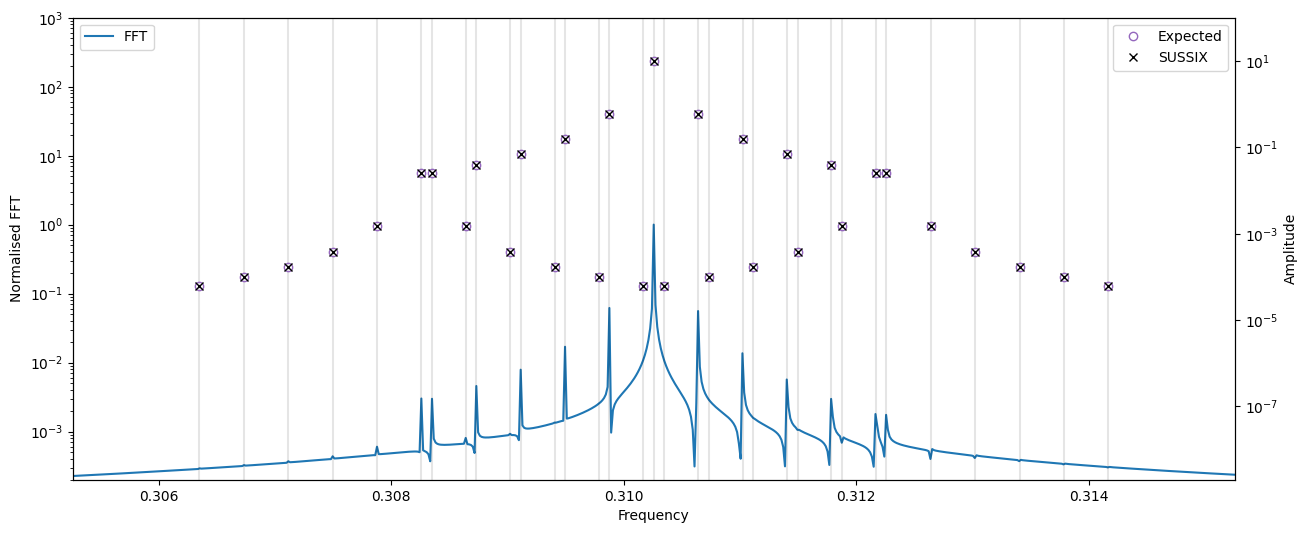

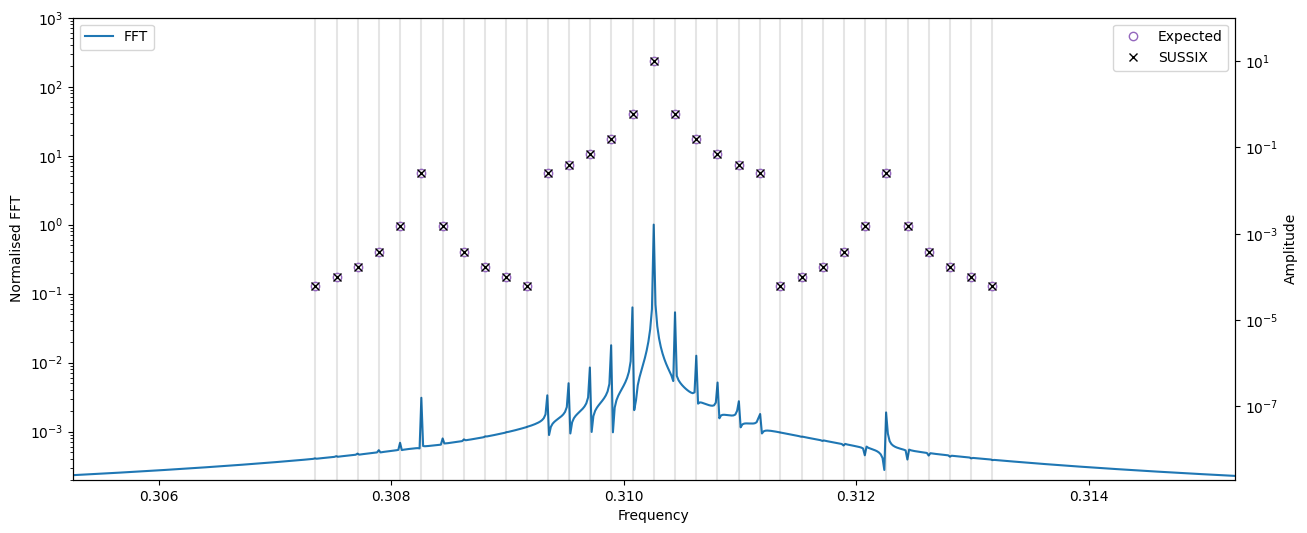

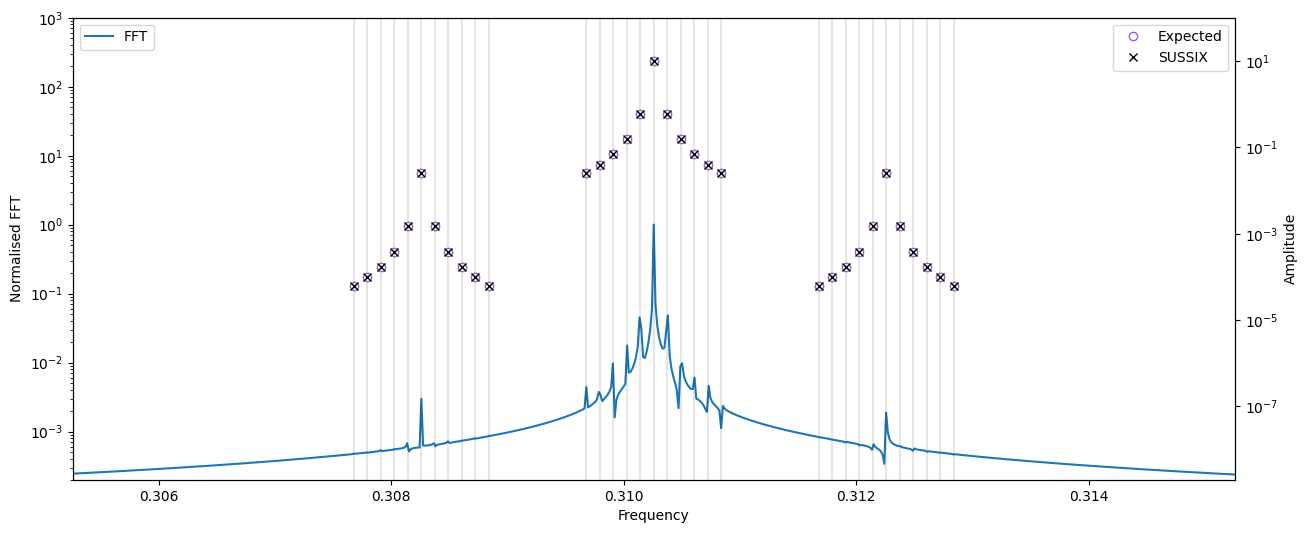

In [ ]:
def get_FFT(x):
    x     = np.array(x)
    turns = np.arange(len(x))

    # Cropping signal to closest power of 2
    Nt      = len(x)
    crop_at = 2**int(np.log2(Nt))



    
    spectrum = np.fft.fft(x[:crop_at])
    freq     = np.fft.fftfreq(turns[:crop_at].shape[-1])

    idx      = np.argmax(np.abs(spectrum))
    Qx       = freq[idx]
    return freq[freq>0],np.abs(spectrum)[freq>0]

import matplotlib.pyplot as plt
for label in ['param_1','param_2','param_3']:

    # Extracting signal
    x,px = example_signals[label]
    Q,A  = example_signals[f'{label}:Q'],example_signals[f'{label}:A']

    z    = x - 1j*px
    N    = np.arange(len(z))


    # Computing FFT
    freq,spectrum = get_FFT(x)

    # Computing frequencies and amplitudes with SUSSIX
    #=================================================
    results = nafflib.harmonics( x, px, num_harmonics = len(Q),window_order = 2,to_pandas=True)
    #=================================================

    plt.figure(figsize=(15,6))
    plt.plot(freq,spectrum/np.max(spectrum),'-',label='FFT')
    plt.yscale('log')
    plt.xlabel('Frequency')
    plt.ylabel('Normalised FFT')
    plt.legend(loc='upper left')
    plt.ylim(2e-4,1e3)


    ax2 = plt.gca().twinx()
    plt.plot(Q,A,'o',color='C4',alpha=1,mfc='none',label='Expected')
    plt.plot(results.frequency,np.abs(results.amplitude),'x',color='k',alpha=1,mfc='none',label='SUSSIX')

    plt.yscale('log')
    plt.ylabel('Amplitude')

    Qs = 0.002
    dQ = Qs/12
    plt.xlim(Q0-30*dQ,Q0+30*dQ)

    for line in Q:
        plt.axvline(line,color='k',alpha=0.1,zorder=-10)

    plt.ylim(2e-9,1e2)

    plt.legend(loc='upper right')

In [ ]:
for num,label in zip([1,2,3],['param_1','param_2','param_3']):
    # set of irrationnal numbers for spectrum spacing
    param = 5*num*(np.pi/3)**num
    print(f'param = {param}')

param = 5.235987755982988
param = 10.966227112321507
param = 17.225709266833228


---
# TESTS
---

In [ ]:
import pandas as pd
# PARTICLES ON MOMENTUM
particles_on_p  = []
KAM_on_p  = []
for file in ['tests/data/LHC_particle_on_momentum_1sigma.csv',
             'tests/data/LHC_particle_on_momentum_3sigma.csv',
             'tests/data/LHC_particle_on_momentum_5sigma.csv']:
    
    # Loading file
    df  = pd.read_csv(file,index_col=0)
    dct = {}
    for plane in ['x','y','zeta']:  

        _df = df[[f'A{plane}',f'Q{plane}']].rename(columns={f'A{plane}':'amplitude',f'Q{plane}':'frequency'}).astype({'amplitude':np.complex128,'frequency':np.float64})

        # Recreating the signal
        nturns = int(1e4)
        z,pz = nafflib.generate_signal(_df.amplitude,_df.frequency,np.arange(int(nturns)))

        # Saving the signal
        dct[f'{plane}']   = z
        dct[f'p{plane}']  = pz
        dct[f'df{plane}'] = _df
    particles_on_p.append(dct)


# Extracting signal
part = particles_on_p[0]
x,px = part['x'],part['px']
N    = np.arange(len(x))

# Choosing number of harmonics
n_harm = 50

A,Q    = nafflib.harmonics(x,px,num_harmonics = n_harm,window_order = 2,window_type = 'hann')
fundamental_tunes = [nafflib.tune(part[f'{plane}'],part[f'p{plane}'],window_order=2) for plane in ['x','y','zeta']]
# r,_,_  = nafflib.find_linear_combinations(Q,fundamental_tunes= [Q[0]])

In [ ]:
fundamental_tunes

[0.3100208433909691, 0.32002046321603844, 0.001866552984419961]

In [ ]:
fundamental_tunes = [nafflib.tune(part[f'{plane}'],part[f'p{plane}'],window_order=2) for plane in ['x','y','zeta']]
max_jklm = 10

# Create a 3D array of all possible combinations of j, k, l
j,k,l,m = np.mgrid[-max_jklm:max_jklm+1, -max_jklm:max_jklm+1,-max_jklm:max_jklm+1,-max_jklm:max_jklm+1]

# nu = j*Q_x + k*Q_y + l*Q_z + m
all_combinations = j * fundamental_tunes[0] + k * fundamental_tunes[1] + l * fundamental_tunes[2] + m

In [ ]:
all_combinations

array([[[[-16.3190786 , -15.3190786 , -14.3190786 , ...,   1.6809214 ,
            2.6809214 ,   3.6809214 ],
         [-16.31721204, -15.31721204, -14.31721204, ...,   1.68278796,
            2.68278796,   3.68278796],
         [-16.31534549, -15.31534549, -14.31534549, ...,   1.68465451,
            2.68465451,   3.68465451],
         ...,
         [-16.28548064, -15.28548064, -14.28548064, ...,   1.71451936,
            2.71451936,   3.71451936],
         [-16.28361409, -15.28361409, -14.28361409, ...,   1.71638591,
            2.71638591,   3.71638591],
         [-16.28174754, -15.28174754, -14.28174754, ...,   1.71825246,
            2.71825246,   3.71825246]],

        [[-15.99905813, -14.99905813, -13.99905813, ...,   2.00094187,
            3.00094187,   4.00094187],
         [-15.99719158, -14.99719158, -13.99719158, ...,   2.00280842,
            3.00280842,   4.00280842],
         [-15.99532503, -14.99532503, -13.99532503, ...,   2.00467497,
            3.00467497,   4.00467

In [ ]:
# Create a 3D array of all possible combinations of r_vec
idx = max_jklm
if len(fundamental_tunes) == 1:
    r1,r2       = np.mgrid[-idx:idx+1, -idx:idx+1]
    r_vec       = [r1,r2]
elif len(fundamental_tunes) == 2:
    r1,r2,r3    = np.mgrid[-idx:idx+1, -idx:idx+1,-idx:idx+1]
    r_vec       = [r1,r2,r3]
else:
    r1,r2,r3,r4 = np.mgrid[-idx:idx+1, -idx:idx+1,-idx:idx+1,-idx:idx+1]
    r_vec       = [r1,r2,r3,r4]
Q_vec = fundamental_tunes + [1]
all_combinations2    = sum([_r*_Q for _r,_Q in zip(r_vec,Q_vec)])

In [ ]:
np.all(all_combinations2 == all_combinations)

True